# EarlyStopping 학습

# 자동차 연비 회귀모델
- Auto MPG 데이터셋을 사용하여 1970년대 후반과 1980년대 초반의 자동차 연비를 예측하는 모델을 만듭니다. 
- 이 정보에는 실린더 수, 배기량, 마력(horsepower), 공차 중량 같은 속성이 포함됩니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 구글 드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

# Working Directory 설정
# import os
# os.chdir('/content/drive/MyDrive/data')

파일은 auto-mpg.csv 입니다.

In [2]:
df = pd.read_csv('./datas_dnn/auto-mpg.csv')

In [3]:
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.isna().sum()

mpg       0
cyl       0
displ     0
hp        0
weight    0
accel     0
yr        0
origin    0
name      0
dtype: int64

In [5]:
y = df['mpg']

In [6]:
X = df.loc[ : ,'cyl' : 'origin' ]

In [7]:
X.head(2)

,cyl,displ,hp,weight,accel,yr,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1


In [8]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

# 데이터 준비

## 데이터 정규화

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### X 데이터 정규화

In [10]:
# X데이터 정규화 객체
sc_X = MinMaxScaler()

In [11]:
X_scaled = sc_X.fit_transform(X)
X_scaled[:5]

array([[1.        , 0.61757106, 0.45652174, 0.5361497 , 0.23809524,
        0.        , 0.        ],
       [1.        , 0.72868217, 0.64673913, 0.58973632, 0.20833333,
        0.        , 0.        ],
       [1.        , 0.64599483, 0.56521739, 0.51686986, 0.17857143,
        0.        , 0.        ],
       [1.        , 0.60981912, 0.56521739, 0.51601928, 0.23809524,
        0.        , 0.        ],
       [1.        , 0.60465116, 0.51086957, 0.52055571, 0.14880952,
        0.        , 0.        ]])

### y 데이터 2차원 reshaphe, 정규화
- 딥러닝에서 데이터 학습이 더 잘됨

In [12]:
# y데이터 정규화 객체
sc_y = MinMaxScaler()

In [13]:
y.shape

(392,)

In [14]:
y.values.reshape(-1,1)[:5]

array([[18.],
       [15.],
       [18.],
       [16.],
       [17.]])

In [15]:
y_scaled = sc_y.fit_transform(y.values.reshape(-1,1))

In [16]:
y_scaled[:5]

array([[0.2393617 ],
       [0.15957447],
       [0.2393617 ],
       [0.18617021],
       [0.21276596]])

### 학습, 테스트 데이터 분할

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, 
    test_size=0.2, 
    random_state=42)

# 딥러닝 모델링

- 텐서플로 2.19 버전에서 바뀐 내용: 옵티마이저 방법을 문자열 형식 대신 객체형식으로 하면 직렬화를 더 작한다고 함.

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam

In [20]:
def build_model( input_dim ) :
  model = Sequential()
  model.add( keras.Input(shape=(input_dim,)) )
  model.add( Dense(64, activation='relu') )
  model.add( Dense(64, activation='relu') )
  model.add( Dense(1, activation='linear'))
    
  model.compile( Adam(learning_rate=0.001),
                 loss='mse', 
                 metrics=['mae'] )
  return model

In [21]:
model = build_model( X_train.shape[1] )

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
X_train.shape

(313, 7)

# 학습 히스토리 확인

In [24]:
history = model.fit(
    X_train, y_train, 
    epochs = 500, 
    validation_split = 0.2,
    verbose = 0    
)

In [25]:
# 화면으로 출력한 결과가 기록 되어 있음
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

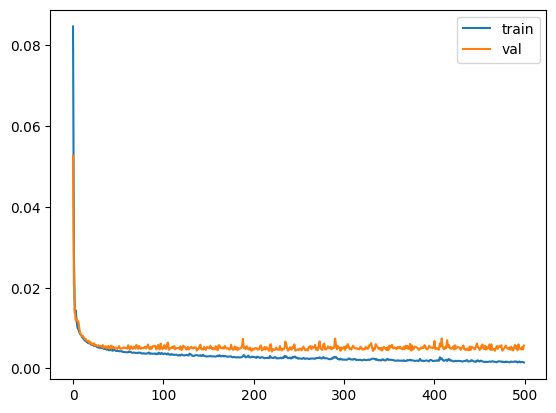

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.show()

이 그래프를 보면 수 백번 에포크를 진행한 이후에는 모델이 거의 향상되지 않는 것 같습니다. model.fit 메서드를 수정하여 검증 점수가 향상되지 않으면 자동으로 훈련을 멈추도록 만들어 보죠. 에포크마다 훈련 상태를 점검하기 위해 EarlyStopping 콜백(callback)을 사용하겠습니다. 지정된 에포크 횟수 동안 성능 향상이 없으면 자동으로 훈련이 멈춥니다.

이 콜백에 대해 더 자세한 내용은 여기를 참고하세요.[링크 텍스트](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

# 학습 자동 중단

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
# 깡통 모델 생성
model = build_model(X_train.shape[1])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
early_stopping=EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=5,
    restore_best_weights=True
)

In [29]:
history2 = model.fit(X_train, y_train, epochs = 100000, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0995 - mae: 0.2581 - val_loss: 0.0468 - val_mae: 0.1796
Epoch 2/100000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0291 - mae: 0.1423 - val_loss: 0.0212 - val_mae: 0.1227
Epoch 3/100000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - mae: 0.1175 - val_loss: 0.0140 - val_mae: 0.0912
Epoch 4/100000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mae: 0.0844 - val_loss: 0.0162 - val_mae: 0.1052
Epoch 5/100000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mae: 0.0893 - val_loss: 0.0153 - val_mae: 0.1017
Epoch 6/100000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mae: 0.0820 - val_loss: 0.0123 - val_mae: 0.0869
Epoch 7/100000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - mae: 0.0795 - val_loss: 0.0119 - val_mae: 0.0844
Epoch 8/100000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101 - mae: 0.0770 - val_loss: 0.0128 - val_mae: 0.0887
Epoch 9/100000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - l

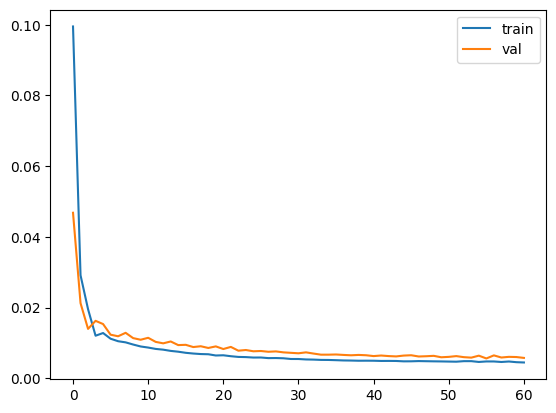

In [30]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(['train', 'val'])
plt.show()

## 평가

In [32]:
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mae: 0.0524 


[0.005114637780934572, 0.052378423511981964]

In [33]:
model.save('mpg_model.keras')

In [35]:
model_2=keras.models.load_model('mpg_model.keras')
model_2.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0051 - mae: 0.0524


[0.005114637780934572, 0.052378423511981964]